In [1]:



import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('JaipurFinalCleanData.csv').set_index('date')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,676.0,26.053254,6.208964,10.00,20.0000,28.000,30.000,38.00
maxtempm,676.0,32.523669,5.987966,18.00,28.0000,33.000,37.000,46.00
mintempm,676.0,19.630178,6.825827,3.00,13.0000,22.000,25.000,32.00
meantempm_1,676.0,26.066568,6.218491,10.00,20.0000,28.000,30.000,38.00
meantempm_2,676.0,26.081361,6.230216,10.00,20.0000,28.000,30.000,38.00
meantempm_3,676.0,26.093195,6.237655,10.00,20.0000,28.000,30.000,38.00
meandewptm_1,676.0,11.995562,8.731127,-10.00,5.0000,10.000,21.000,26.00
meandewptm_2,676.0,11.995562,8.731127,-10.00,5.0000,10.000,21.000,26.00
meandewptm_3,676.0,11.989645,8.738584,-10.00,5.0000,10.000,21.000,26.00
meanpressurem_1,676.0,1009.499911,6.481713,997.63,1003.6975,1008.830,1015.525,1023.43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 2016-05-04 to 2018-03-11
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meantempm        676 non-null    int64  
 1   maxtempm         676 non-null    int64  
 2   mintempm         676 non-null    int64  
 3   meantempm_1      676 non-null    float64
 4   meantempm_2      676 non-null    float64
 5   meantempm_3      676 non-null    float64
 6   meandewptm_1     676 non-null    float64
 7   meandewptm_2     676 non-null    float64
 8   meandewptm_3     676 non-null    float64
 9   meanpressurem_1  676 non-null    float64
 10  meanpressurem_2  676 non-null    float64
 11  meanpressurem_3  676 non-null    float64
 12  maxhumidity_1    676 non-null    float64
 13  maxhumidity_2    676 non-null    float64
 14  maxhumidity_3    676 non-null    float64
 15  minhumidity_1    676 non-null    float64
 16  minhumidity_2    676 non-null    float64
 17  minhu

In [4]:
df = df.drop(['mintempm', 'maxtempm'], axis=1)

X = df[[col for col in df.columns if col != 'meantempm']]

y = df['meantempm']

In [5]:

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [6]:
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   540, Training features   36
Validation instances 68, Validation features 36
Testing instances    68, Testing features    36


In [7]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [8]:
print(tf.__version__)


2.1.0


In [9]:
        regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [10]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=260): 
    return tf.compat.v1.estimator.inputs.pandas_input_fn(x=X,
                                                         y=y,
                                                         num_epochs=num_epochs,
                                                         shuffle=shuffle,
                                                         batch_size=batch_size)

In [11]:
from tensorflow_core.estimator import inputs

evaluations = []
STEPS = 260
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Call initializer instance with the dtype argument

INFO:tensorflow:Loss for final step: 12.140278.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-08T00:37:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-520
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.88219s
INFO:tensorflow:Finished evaluation at 2020-05-08-00:37:37
INFO

INFO:tensorflow:loss = 9.620108, step = 780
INFO:tensorflow:global_step/sec: 41.7433
INFO:tensorflow:loss = 7.5177093, step = 880 (2.399 sec)
INFO:tensorflow:global_step/sec: 71.1117
INFO:tensorflow:loss = 7.171397, step = 980 (1.405 sec)
INFO:tensorflow:Saving checkpoints for 1040 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 7.023838.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-08T00:38:11Z
INFO:tensorflow:

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1300 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 6.724118, step = 1300
INFO:tensorflow:global_step/sec: 77.9686
INFO:tensorflow:loss = 6.6405225, step = 1400 (1.285 sec)
INFO:tensorflow:global_step/sec: 78.8887
INFO:tensorflow:loss = 6.0758414, step = 1500 (1.270 sec)
INFO:tensorflow:Saving checkpoints for 1560 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 6.261428.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1820
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1820 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5.54576, step = 1820
INFO:tensorflow:global_step/sec: 64.016
INFO:tensorflow:loss = 5.8001757, step = 1920 (1.536 sec)
INFO:tensorflow:global_step/sec: 84.3249
INFO:tensorflow:loss = 5.882523, step = 2020 (1.189 sec)
INFO:tensorflow:Saving checkpoints for 2080 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5.1877065.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.ke

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2340
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2340 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5.7124786, step = 2340
INFO:tensorflow:global_step/sec: 78.3587
INFO:tensorflow:loss = 5.231463, step = 2440 (1.280 sec)
INFO:tensorflow:global_step/sec: 86.3853
INFO:tensorflow:loss = 5.2838473, step = 2540 (1.158 sec)
INFO:tensorflow:Saving checkpoints for 2600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5.330093.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2860 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5.0901923, step = 2860
INFO:tensorflow:global_step/sec: 80.7365
INFO:tensorflow:loss = 5.262921, step = 2960 (1.243 sec)
INFO:tensorflow:global_step/sec: 82.0085
INFO:tensorflow:loss = 5.20685, step = 3060 (1.231 sec)
INFO:tensorflow:Saving checkpoints for 3120 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4.99526.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.ker

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3380 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5.4961314, step = 3380
INFO:tensorflow:global_step/sec: 67.4747
INFO:tensorflow:loss = 4.979448, step = 3480 (1.484 sec)
INFO:tensorflow:global_step/sec: 73.2412
INFO:tensorflow:loss = 4.9961524, step = 3580 (1.365 sec)
INFO:tensorflow:Saving checkpoints for 3640 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5.0799985.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3900 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4.955235, step = 3900
INFO:tensorflow:global_step/sec: 79.6035
INFO:tensorflow:loss = 3.8320487, step = 4000 (1.272 sec)
INFO:tensorflow:global_step/sec: 84.7326
INFO:tensorflow:loss = 4.243065, step = 4100 (1.180 sec)
INFO:tensorflow:Saving checkpoints for 4160 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4.293399.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.k

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4420 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4.660289, step = 4420
INFO:tensorflow:global_step/sec: 66.845
INFO:tensorflow:loss = 4.348066, step = 4520 (1.498 sec)
INFO:tensorflow:global_step/sec: 73.0812
INFO:tensorflow:loss = 5.1746674, step = 4620 (1.367 sec)
INFO:tensorflow:Saving checkpoints for 4680 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4.318388.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.ke

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4940
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4940 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4.2713346, step = 4940
INFO:tensorflow:global_step/sec: 62.3167
INFO:tensorflow:loss = 4.610281, step = 5040 (1.608 sec)
INFO:tensorflow:global_step/sec: 70.7604
INFO:tensorflow:loss = 4.679019, step = 5140 (1.415 sec)
INFO:tensorflow:Saving checkpoints for 5200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4.3418627.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5460
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5460 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4.9397283, step = 5460
INFO:tensorflow:global_step/sec: 49.6128
INFO:tensorflow:loss = 4.3341355, step = 5560 (2.019 sec)
INFO:tensorflow:global_step/sec: 72.0828
INFO:tensorflow:loss = 4.546936, step = 5660 (1.385 sec)
INFO:tensorflow:Saving checkpoints for 5720 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4.6367807.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5980
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5980 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4.000094, step = 5980
INFO:tensorflow:global_step/sec: 72.816
INFO:tensorflow:loss = 3.9584568, step = 6080 (1.374 sec)
INFO:tensorflow:global_step/sec: 76.8923
INFO:tensorflow:loss = 3.600947, step = 6180 (1.301 sec)
INFO:tensorflow:Saving checkpoints for 6240 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.5229783.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.k

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 6500 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4.4631896, step = 6500
INFO:tensorflow:global_step/sec: 67.9247
INFO:tensorflow:loss = 4.028829, step = 6600 (1.473 sec)
INFO:tensorflow:global_step/sec: 75.1067
INFO:tensorflow:loss = 3.5260942, step = 6700 (1.332 sec)
INFO:tensorflow:Saving checkpoints for 6760 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.6675472.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7020
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 7020 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3.181937, step = 7020
INFO:tensorflow:global_step/sec: 72.2388
INFO:tensorflow:loss = 3.2477505, step = 7120 (1.389 sec)
INFO:tensorflow:global_step/sec: 75.521
INFO:tensorflow:loss = 3.7035353, step = 7220 (1.323 sec)
INFO:tensorflow:Saving checkpoints for 7280 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.874248.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.k

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7540
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 7540 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3.1701152, step = 7540
INFO:tensorflow:global_step/sec: 69.2455
INFO:tensorflow:loss = 4.3716235, step = 7640 (1.444 sec)
INFO:tensorflow:global_step/sec: 57.625
INFO:tensorflow:loss = 3.5755785, step = 7740 (1.738 sec)
INFO:tensorflow:Saving checkpoints for 7800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.8457386.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8060
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8060 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3.4905794, step = 8060
INFO:tensorflow:global_step/sec: 72.083
INFO:tensorflow:loss = 3.4274418, step = 8160 (1.391 sec)
INFO:tensorflow:global_step/sec: 71.9085
INFO:tensorflow:loss = 3.6094804, step = 8260 (1.390 sec)
INFO:tensorflow:Saving checkpoints for 8320 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4.091341.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8580
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8580 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3.8033648, step = 8580
INFO:tensorflow:global_step/sec: 78.6136
INFO:tensorflow:loss = 3.4348202, step = 8680 (1.277 sec)
INFO:tensorflow:global_step/sec: 76.683
INFO:tensorflow:loss = 3.665836, step = 8780 (1.306 sec)
INFO:tensorflow:Saving checkpoints for 8840 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.420891.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.k

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 9100 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3.1844888, step = 9100
INFO:tensorflow:global_step/sec: 63.9721
INFO:tensorflow:loss = 4.102283, step = 9200 (1.567 sec)
INFO:tensorflow:global_step/sec: 85.6958
INFO:tensorflow:loss = 3.3437898, step = 9300 (1.167 sec)
INFO:tensorflow:Saving checkpoints for 9360 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.7227612.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9620
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 9620 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3.7861218, step = 9620
INFO:tensorflow:global_step/sec: 69.0332
INFO:tensorflow:loss = 3.505297, step = 9720 (1.450 sec)
INFO:tensorflow:global_step/sec: 75.8454
INFO:tensorflow:loss = 3.1145098, step = 9820 (1.319 sec)
INFO:tensorflow:Saving checkpoints for 9880 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.4103715.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10140 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3.166072, step = 10140
INFO:tensorflow:global_step/sec: 76.6571
INFO:tensorflow:loss = 3.0784626, step = 10240 (1.309 sec)
INFO:tensorflow:global_step/sec: 81.3859
INFO:tensorflow:loss = 3.3504953, step = 10340 (1.229 sec)
INFO:tensorflow:Saving checkpoints for 10400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.2916818.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, ca

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10660
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10660 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3.4197943, step = 10660
INFO:tensorflow:global_step/sec: 58.9808
INFO:tensorflow:loss = 3.3151011, step = 10760 (1.699 sec)
INFO:tensorflow:global_step/sec: 77.0104
INFO:tensorflow:loss = 2.6955028, step = 10860 (1.297 sec)
INFO:tensorflow:Saving checkpoints for 10920 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.9483695.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, c

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11180 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3.3915355, step = 11180
INFO:tensorflow:global_step/sec: 73.1345
INFO:tensorflow:loss = 3.3471012, step = 11280 (1.369 sec)
INFO:tensorflow:global_step/sec: 74.8824
INFO:tensorflow:loss = 3.033026, step = 11380 (1.335 sec)
INFO:tensorflow:Saving checkpoints for 11440 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.212709.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, cal

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11700 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3.4446933, step = 11700
INFO:tensorflow:global_step/sec: 72.3953
INFO:tensorflow:loss = 3.120414, step = 11800 (1.384 sec)
INFO:tensorflow:global_step/sec: 77.787
INFO:tensorflow:loss = 3.227413, step = 11900 (1.284 sec)
INFO:tensorflow:Saving checkpoints for 11960 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.0167925.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12220 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.6523578, step = 12220
INFO:tensorflow:global_step/sec: 60.3294
INFO:tensorflow:loss = 2.7450998, step = 12320 (1.663 sec)
INFO:tensorflow:global_step/sec: 73.3485
INFO:tensorflow:loss = 2.7328603, step = 12420 (1.362 sec)
INFO:tensorflow:Saving checkpoints for 12480 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.1484334.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, c

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12740
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12740 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.8532622, step = 12740
INFO:tensorflow:global_step/sec: 48.8157
INFO:tensorflow:loss = 2.9025662, step = 12840 (2.056 sec)
INFO:tensorflow:global_step/sec: 51.0008
INFO:tensorflow:loss = 3.0897427, step = 12940 (1.959 sec)
INFO:tensorflow:Saving checkpoints for 13000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.7490876.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, c

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13260
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 13260 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.7173984, step = 13260
INFO:tensorflow:global_step/sec: 56.6508
INFO:tensorflow:loss = 2.4618945, step = 13360 (1.765 sec)
INFO:tensorflow:global_step/sec: 69.9769
INFO:tensorflow:loss = 2.944036, step = 13460 (1.429 sec)
INFO:tensorflow:Saving checkpoints for 13520 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.1295738.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, ca

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13780
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 13780 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.8777199, step = 13780
INFO:tensorflow:global_step/sec: 77.3668
INFO:tensorflow:loss = 3.1098633, step = 13880 (1.296 sec)
INFO:tensorflow:global_step/sec: 83.7127
INFO:tensorflow:loss = 3.2816105, step = 13980 (1.194 sec)
INFO:tensorflow:Saving checkpoints for 14040 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.9054337.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, c

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 14300 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.8491158, step = 14300
INFO:tensorflow:global_step/sec: 49.377
INFO:tensorflow:loss = 2.7733092, step = 14400 (2.025 sec)
INFO:tensorflow:global_step/sec: 48.8481
INFO:tensorflow:loss = 3.2738929, step = 14500 (2.053 sec)
INFO:tensorflow:Saving checkpoints for 14560 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.9889455.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, ca

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14820
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 14820 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.6955707, step = 14820
INFO:tensorflow:global_step/sec: 41.6254
INFO:tensorflow:loss = 2.7078204, step = 14920 (2.404 sec)
INFO:tensorflow:global_step/sec: 55.5624
INFO:tensorflow:loss = 2.3315976, step = 15020 (1.795 sec)
INFO:tensorflow:Saving checkpoints for 15080 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.4746208.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, c

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15340
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 15340 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.8566062, step = 15340
INFO:tensorflow:global_step/sec: 77.3889
INFO:tensorflow:loss = 2.2425053, step = 15440 (1.296 sec)
INFO:tensorflow:global_step/sec: 66.4351
INFO:tensorflow:loss = 2.815871, step = 15540 (1.508 sec)
INFO:tensorflow:Saving checkpoints for 15600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.843163.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, cal

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 15860 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.6503582, step = 15860
INFO:tensorflow:global_step/sec: 79.1978
INFO:tensorflow:loss = 2.591743, step = 15960 (1.260 sec)
INFO:tensorflow:global_step/sec: 77.7875
INFO:tensorflow:loss = 3.1906524, step = 16060 (1.290 sec)
INFO:tensorflow:Saving checkpoints for 16120 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.7370577.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, ca

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16380 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.940018, step = 16380
INFO:tensorflow:global_step/sec: 37.4427
INFO:tensorflow:loss = 2.416407, step = 16480 (2.689 sec)
INFO:tensorflow:global_step/sec: 40.3166
INFO:tensorflow:loss = 2.6005325, step = 16580 (2.467 sec)
INFO:tensorflow:Saving checkpoints for 16640 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.4757888.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, cal

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16900 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.7979984, step = 16900
INFO:tensorflow:global_step/sec: 71.8249
INFO:tensorflow:loss = 2.6715364, step = 17000 (1.394 sec)
INFO:tensorflow:global_step/sec: 77.4266
INFO:tensorflow:loss = 2.950462, step = 17100 (1.293 sec)
INFO:tensorflow:Saving checkpoints for 17160 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.3998225.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, ca

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 17420 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3.1655662, step = 17420
INFO:tensorflow:global_step/sec: 43.728
INFO:tensorflow:loss = 2.6443732, step = 17520 (2.217 sec)
INFO:tensorflow:global_step/sec: 75.0557
INFO:tensorflow:loss = 2.8544683, step = 17620 (1.331 sec)
INFO:tensorflow:Saving checkpoints for 17680 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.0475745.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, ca

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17940
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 17940 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.3250403, step = 17940
INFO:tensorflow:global_step/sec: 60.5115
INFO:tensorflow:loss = 2.526871, step = 18040 (1.654 sec)
INFO:tensorflow:global_step/sec: 74.5483
INFO:tensorflow:loss = 2.8608463, step = 18140 (1.340 sec)
INFO:tensorflow:Saving checkpoints for 18200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.0767162.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, ca

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18460
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 18460 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.284663, step = 18460
INFO:tensorflow:global_step/sec: 61.5515
INFO:tensorflow:loss = 2.4731035, step = 18560 (1.627 sec)
INFO:tensorflow:global_step/sec: 67.5657
INFO:tensorflow:loss = 2.4065933, step = 18660 (1.480 sec)
INFO:tensorflow:Saving checkpoints for 18720 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.580893.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, cal

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18980
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 18980 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.7803006, step = 18980
INFO:tensorflow:global_step/sec: 80.1694
INFO:tensorflow:loss = 2.7334032, step = 19080 (1.251 sec)
INFO:tensorflow:global_step/sec: 77.6064
INFO:tensorflow:loss = 2.504515, step = 19180 (1.289 sec)
INFO:tensorflow:Saving checkpoints for 19240 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.0659585.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, ca

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19500 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.5400562, step = 19500
INFO:tensorflow:global_step/sec: 61.0271
INFO:tensorflow:loss = 2.6316009, step = 19600 (1.642 sec)
INFO:tensorflow:global_step/sec: 75.6736
INFO:tensorflow:loss = 2.719476, step = 19700 (1.320 sec)
INFO:tensorflow:Saving checkpoints for 19760 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.638948.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, cal

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20020
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20020 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.4953687, step = 20020
INFO:tensorflow:global_step/sec: 40.8881
INFO:tensorflow:loss = 2.9025104, step = 20120 (2.447 sec)
INFO:tensorflow:global_step/sec: 77.4321
INFO:tensorflow:loss = 2.7325618, step = 20220 (1.290 sec)
INFO:tensorflow:Saving checkpoints for 20280 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.7720394.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, c

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20540
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20540 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.7933617, step = 20540
INFO:tensorflow:global_step/sec: 53.1106
INFO:tensorflow:loss = 2.5383203, step = 20640 (1.897 sec)
INFO:tensorflow:global_step/sec: 67.4896
INFO:tensorflow:loss = 3.1459591, step = 20740 (1.481 sec)
INFO:tensorflow:Saving checkpoints for 20800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.8251808.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, c

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21060
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 21060 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.9721181, step = 21060
INFO:tensorflow:global_step/sec: 68.5355
INFO:tensorflow:loss = 2.1777081, step = 21160 (1.462 sec)
INFO:tensorflow:global_step/sec: 73.1879
INFO:tensorflow:loss = 2.357555, step = 21260 (1.365 sec)
INFO:tensorflow:Saving checkpoints for 21320 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.5306814.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, ca

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21580
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 21580 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.4311814, step = 21580
INFO:tensorflow:global_step/sec: 65.9834
INFO:tensorflow:loss = 2.5388422, step = 21680 (1.520 sec)
INFO:tensorflow:global_step/sec: 52.5571
INFO:tensorflow:loss = 2.7059762, step = 21780 (1.897 sec)
INFO:tensorflow:Saving checkpoints for 21840 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.7160661.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, c

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 22100 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.34134, step = 22100
INFO:tensorflow:global_step/sec: 73.3625
INFO:tensorflow:loss = 2.5646732, step = 22200 (1.369 sec)
INFO:tensorflow:global_step/sec: 81.5686
INFO:tensorflow:loss = 2.7325678, step = 22300 (1.224 sec)
INFO:tensorflow:Saving checkpoints for 22360 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.7914.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22620
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 22620 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.934949, step = 22620
INFO:tensorflow:global_step/sec: 61.5515
INFO:tensorflow:loss = 2.8269193, step = 22720 (1.626 sec)
INFO:tensorflow:global_step/sec: 66.5785
INFO:tensorflow:loss = 2.8824282, step = 22820 (1.503 sec)
INFO:tensorflow:Saving checkpoints for 22880 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.2716825.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, ca

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 23140 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.3484178, step = 23140
INFO:tensorflow:global_step/sec: 70.2153
INFO:tensorflow:loss = 2.3239052, step = 23240 (1.425 sec)
INFO:tensorflow:global_step/sec: 72.5
INFO:tensorflow:loss = 2.6199706, step = 23340 (1.380 sec)
INFO:tensorflow:Saving checkpoints for 23400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.322119.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23660
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 23660 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.1683083, step = 23660
INFO:tensorflow:global_step/sec: 77.178
INFO:tensorflow:loss = 2.5201383, step = 23760 (1.300 sec)
INFO:tensorflow:global_step/sec: 83.2787
INFO:tensorflow:loss = 2.6026049, step = 23860 (1.201 sec)
INFO:tensorflow:Saving checkpoints for 23920 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 3.133418.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, cal

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 24180 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3.0130596, step = 24180
INFO:tensorflow:global_step/sec: 67.7918
INFO:tensorflow:loss = 2.4458637, step = 24280 (1.477 sec)
INFO:tensorflow:global_step/sec: 77.5427
INFO:tensorflow:loss = 2.8921452, step = 24380 (1.289 sec)
INFO:tensorflow:Saving checkpoints for 24440 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.4841266.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, c

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 24700 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.668668, step = 24700
INFO:tensorflow:global_step/sec: 76.9632
INFO:tensorflow:loss = 2.4519382, step = 24800 (1.304 sec)
INFO:tensorflow:global_step/sec: 69.9462
INFO:tensorflow:loss = 2.584785, step = 24900 (1.430 sec)
INFO:tensorflow:Saving checkpoints for 24960 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1.9817005.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, cal

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 25220 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.3378503, step = 25220
INFO:tensorflow:global_step/sec: 70.5396
INFO:tensorflow:loss = 2.450171, step = 25320 (1.418 sec)
INFO:tensorflow:global_step/sec: 76.5589
INFO:tensorflow:loss = 2.6948843, step = 25420 (1.311 sec)
INFO:tensorflow:Saving checkpoints for 25480 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.7215388.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, ca

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25740
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 25740 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2.7714646, step = 25740
INFO:tensorflow:global_step/sec: 50.1321
INFO:tensorflow:loss = 2.2783453, step = 25840 (1.996 sec)
INFO:tensorflow:global_step/sec: 65.0062
INFO:tensorflow:loss = 2.4377086, step = 25940 (1.537 sec)
INFO:tensorflow:Saving checkpoints for 26000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2.1691692.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, c

In [12]:
evaluations[0]

{'average_loss': 24.928421,
 'label/mean': 26.57353,
 'loss': 24.928421,
 'prediction/mean': 26.730179,
 'global_step': 260}

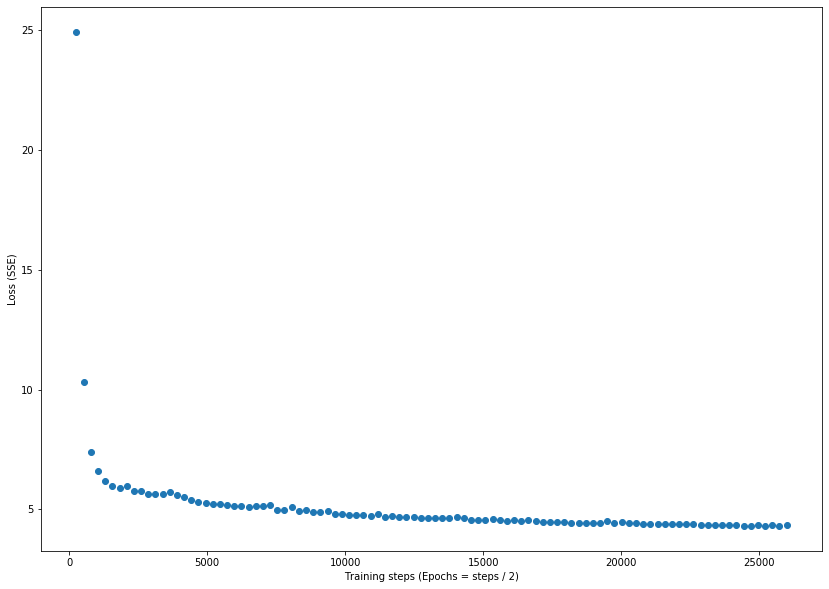

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

# Model Saving 
### ( so that you dont need to train every time to use the model )

In [15]:
from pickle import dump
from pickle import load 

filename = 'regressor_model.sav'
dump(regressor, open(filename, 'wb'))
print(filename+" saved successfully ")
 
regressor_model = load(open(filename, 'rb'))

AttributeError: Can't pickle local object 'DNNRegressorV2.__init__.<locals>._model_fn'

In [16]:
tf.saved_model.save(regressor, "/tmp/mobilenet/1/")


ValueError: Expected a Trackable object for export, got <tensorflow_estimator.python.estimator.canned.dnn.DNNRegressorV2 object at 0x0000026D0A6FA108>.

In [17]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("\n\nThe Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-26000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


The Explained Variance: 0.94
The Mean Absolute Error: 1.30 degrees Celcius
The Median Absolute Error: 1.16 degrees Celcius
